# Artificial Intelligence for Security: group project
##### by Alexander Stanimirov, S. M., D. F., L. C.

## Part 1: Preliminary data analysis and cleanup 

<div class="alert alert-block alert-success">
The first part of the assignment consists of loading up the first week CIDDS-001 dataset, performing some basic analysis on the DataFrame, and cleaning up the data as needed.
</div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "C:/Users/Bearson/Desktop/Cyber Risk material/Artificial Intelligence for Security/data/data/NetworkTraffic/CIDDS-001-internal-week1_10pcSample.csv"
df = pd.read_csv(file_path, header = 0)

In [3]:
df.head(5)

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,23,2017-03-15 00:01:17.728,0.047,TCP,192.168.220.16,45586,10000_35,443.0,5,906,1,.AP.S.,0,normal,---,---,---
1,36,2017-03-15 00:01:18.457,0.170,TCP,10003_195,80,192.168.220.16,48286.0,3,908,1,.AP.S.,32,normal,---,---,---
2,30,2017-03-15 00:01:18.511,0.003,TCP,10002_113,443,192.168.220.16,49062.0,2,1089,1,.AP...,32,normal,---,---,---
3,46,2017-03-15 00:01:22.400,0.000,TCP,EXT_SERVER,8082,192.168.220.15,37039.0,1,212,1,.AP...,32,normal,---,---,---
4,51,2017-03-15 00:01:24.152,0.266,TCP,192.168.200.9,52290,EXT_SERVER,8082.0,2,319,1,.AP...,0,normal,---,---,---


In [4]:
df = df.drop("Unnamed: 0", axis = 1)

In [5]:
df.shape

(845152, 16)

<div class="alert alert-block alert-success">
There are 845152 rows and 16 columns after dropping the column with the indices from the .csv file.
<div>

In [6]:
df.dtypes

Date first seen       object
Duration             float64
Proto                 object
Src IP Addr           object
Src Pt                 int64
Dst IP Addr           object
Dst Pt               float64
Packets                int64
Bytes                 object
Flows                  int64
Flags                 object
Tos                    int64
class                 object
attackType            object
attackID              object
attackDescription     object
dtype: object

In [7]:
df['class'].value_counts()

normal      700513
attacker     75124
victim       69515
Name: class, dtype: int64

<div class="alert alert-block alert-success">
There are three possible values for 'class': normal, attacker, and victim.
</div>

In [8]:
df['attackType'].value_counts()

---           700513
dos           125430
portScan       18686
pingScan         355
bruteForce       168
Name: attackType, dtype: int64

In [9]:
vals = df['attackType'].value_counts().values

none_percent = (vals.max() / vals.sum())*100
print(none_percent)

two_highest_percent = ((df['attackType'].value_counts().dos + df['attackType'].value_counts().portScan) / (vals.sum() - vals.max())) * 100
print(two_highest_percent)

print(100 - two_highest_percent)

82.88603706788838
99.63841011068936
0.3615898893106362


<div class="alert alert-block alert-success">
There are 5 possible values for attackType, with '---' denoting no actual attack. Nearly 83% of entries have no attack type, and of the 4 possible attack types, the top 2 comprise 99.6% of occurrences.
<div>

In [10]:
df['attackDescription'].value_counts()

---                                      718777
10000 connections on 192.168.100.6:80    107167
nmap args: -sS -T 3                        7864
nmap args: -sS -T 2                        6211
nmap args: -sS -T 1                        4611
nmap args: -n -sP -PE -T 2                  180
nmap args: -n -sP -PE -T 1                  100
192.168.200.8                                80
nmap args: -n -sP -PE -T 3                   75
192.168.200.4                                53
192.168.100.4                                34
Name: attackDescription, dtype: int64

<div class="alert alert-block alert-success">
At a glance, attackDescription's values also appear to be similarly skewed.
</div>

<div class="alert alert-block alert-success">
As the report says, no entry with class label "normal" (with corresponding attackType "---") has an attackDescription or attackId. Below are a few quick checks to verify this.
</div>

In [11]:
df_has_desc = df[(df['attackType'] == "---") & (df['attackDescription'] != "---")]

In [12]:
df_has_desc.shape[0]

0

In [13]:
df_has_id = df[(df['attackType'] == "---") & (df['attackID'] != "---")]

In [14]:
df_has_id.shape[0]

0

<div class="alert alert-block alert-success">
Let's examine some of the other columns.
</div>

In [15]:
df['Flows'].value_counts()

1    845152
Name: Flows, dtype: int64

In [16]:
df['Flows'].var()

0.0

<div class="alert alert-block alert-success">
The Flows column can be safely dropped as the only possible value is 1 and every single entry has it. This equates to 0 variance for the attribute.
</div>

In [17]:
df = df.drop("Flows", axis = 1)

In [18]:
uniques = set(df['Bytes'])

In [19]:
print(len(uniques))
print(uniques)

23284
{'    5536', '   44696', '   36202', '    6286', '   70272', ' 377.1 M', '     229', '    6519', '    3144', '   80320', '   26715', '  246738', '     859', '    6822', '  145690', '   10241', '  143329', '  475489', '   10948', '   10095', '  380191', '   73188', '   65266', '     935', '   60757', '    4956', '   10261', '    2708', '  407575', '    6104', '  121471', '    8807', '    1198', '   10249', '  377720', '    7942', '   48775', '    3890', '    4220', '    3934', '    5248', '  113210', '   18595', '  346550', '   82107', '   13881', '  151634', '   44396', '    1886', '   15445', '   18671', '   15093', '   11124', '    8145', '   34080', '  110135', '    3512', '    4793', '   43520', '   22450', '     391', '    7736', '   72807', '  135874', '    1843', '     276', '    6367', '   43242', '    1585', '   21241', '    9796', '    2652', '    8102', '    8821', '   20723', '   12836', '   20962', '    3001', '   20088', '  377323', '    5399', '    7776', '   11970

In [20]:
print(set(''.join(uniques)))

{'5', '2', '6', '8', '3', '1', '4', '7', '0', '.', ' ', 'M', '9'}


<div class="alert alert-block alert-success">
It turns out the Bytes column's values are saved as strings of length 8. It would be more useful to convert them to integers, noting that the only characters besides the numbers and whitespace are '.' and 'M', which always appear together, and the values containing them are taken to mean megabytes.
<div>

In [21]:
conv = []
for val in df['Bytes']:
    val = val.replace(" ", "")
    if "M" in val:
        val = val.replace("M", "")
        val = val.replace(".", "")
        val = int(val) * 100000
    else:
        val = int(val)
    conv.append(val)

In [22]:
df = df.drop('Bytes', axis = 1)
new_bytes = pd.DataFrame({'bytes' : conv})
df = pd.concat([df, new_bytes], axis = 1)

<div class="alert alert-block alert-success">
Let's check our new 'bytes' column and if the type has been successfully converted, as well as the current state of our DataFrame:
</div>

In [23]:
df['bytes'].dtype

dtype('int64')

In [24]:
conv_uniques = set(conv)
print(len(conv_uniques))
print(conv_uniques)

23284
{42, 54, 55, 57, 58, 262204, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262

In [25]:
df.head(5)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Flags,Tos,class,attackType,attackID,attackDescription,bytes
0,2017-03-15 00:01:17.728,0.047,TCP,192.168.220.16,45586,10000_35,443.0,5,.AP.S.,0,normal,---,---,---,906
1,2017-03-15 00:01:18.457,0.170,TCP,10003_195,80,192.168.220.16,48286.0,3,.AP.S.,32,normal,---,---,---,908
2,2017-03-15 00:01:18.511,0.003,TCP,10002_113,443,192.168.220.16,49062.0,2,.AP...,32,normal,---,---,---,1089
3,2017-03-15 00:01:22.400,0.000,TCP,EXT_SERVER,8082,192.168.220.15,37039.0,1,.AP...,32,normal,---,---,---,212
4,2017-03-15 00:01:24.152,0.266,TCP,192.168.200.9,52290,EXT_SERVER,8082.0,2,.AP...,0,normal,---,---,---,319


<div class="alert alert-block alert-success">
It is not very clear what the values in the tos column represent (type of service?).
</div>

In [26]:
df['Tos'].value_counts()

0      607545
32     237131
192       386
16         89
12          1
Name: Tos, dtype: int64

In [27]:
df['Tos'].var()

221.94930063071905

In [28]:
# highly unbalanced column of most likely categorical values; let's get rid of it
df = df.drop('Tos', axis = 1)

In [29]:
df['Proto'].value_counts()

TCP      739301
UDP      104747
ICMP       1075
IGMP         29
Name: Proto, dtype: int64

<div class="alert alert-block alert-success">
At this point, we should rename our columns to maintain a common, readable format.
</div>

In [30]:
df = df.rename({'Date first seen': 'date_first_seen', 'Duration': 'duration', 'Proto': 'protocol', 'Src IP Addr': 'src_ip',
                'Src Pt': 'src_pt', 'Dst IP Addr': 'dst_ip', 'Dst Pt': 'dst_pt', 'Packets': 'packets', 'Flags': 'flags',
                'attackType': 'attack_type', 'attackID': 'attack_id', 'attackDescription': 'attack_desc'}, axis=1)

In [31]:
df.columns

Index(['date_first_seen', 'duration', 'protocol', 'src_ip', 'src_pt', 'dst_ip',
       'dst_pt', 'packets', 'flags', 'class', 'attack_type', 'attack_id',
       'attack_desc', 'bytes'],
      dtype='object')

In [32]:
df.dtypes

date_first_seen     object
duration           float64
protocol            object
src_ip              object
src_pt               int64
dst_ip              object
dst_pt             float64
packets              int64
flags               object
class               object
attack_type         object
attack_id           object
attack_desc         object
bytes                int64
dtype: object

<div class="alert alert-block alert-success">
With our bytes column type changed, the numeric variables are duration, packets, and bytes. While ports are expressed as numbers, it doesn't really make sense to calculate their mean or median, for example. Ports should be considered therefore categorical, and probably shouldn't be used as a feature, since the number of possible ports (as we will soon see) doesn't lend itself well to one-hot-encoding.
<div>

<div class="alert alert-block alert-success">
Another peculiarity is dst_pt's values being expressed as floating points (should be int), although a type conversion probably isn't warranted.
</div>

In [33]:
unexpected = []
for num in df['dst_pt']:
    num = str(num)
    if ".0" not in num:
        unexpected.append(num)
print(set(unexpected))
print(len(set(unexpected))) # only a few possible values have a number other than 0 after the decimal point

{'3.4', '3.3', '3.1'}
3


## Part 2: Data visualization

<div class="alert alert-block alert-success">
Before training any classifiers, it is a good idea to understand the scale of the data you're working with and if there is anything that stands out in particular.
</div>

<div class="alert alert-block alert-success">
Below are some statistics for the numerical variables as well as plots to get an idea of their distributions in the dataset.
<div>

In [34]:
import matplotlib.pyplot as plt

In [35]:
print('duration mean: ', df['duration'].mean())
print('duration median: ', df['duration'].median())
print('duration mode: ', df['duration'].mode()[0])
print('no. duration unique values: ', len(df['duration'].unique()))
print('max duration value: ', df['duration'].max())

# 0 being the most common value might be problematic

duration mean:  0.11383969865759577
duration median:  0.0
duration mode:  0.0
no. duration unique values:  4756
max duration value:  135.403


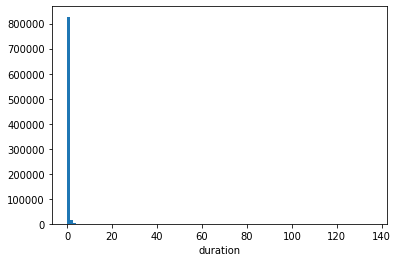

In [36]:
fig, ax = plt.subplots()
plt.hist(df['duration'].values, bins = 100)
ax.set_xlabel('duration')
plt.show()

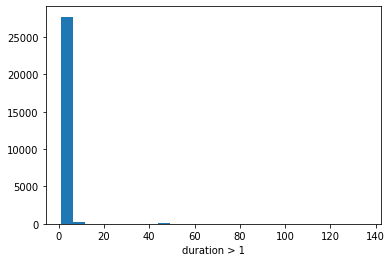

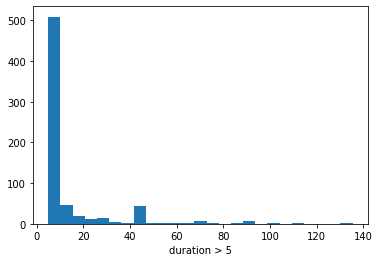

In [37]:
fig_a, ax_a = plt.subplots()
ax_a.hist(df[df['duration'] > 1]['duration'].values, bins = 25)
ax_a.set_xlabel('duration > 1')
plt.show()

fig_b, ax_b = plt.subplots()
ax_b.hist(df[df['duration'] > 5]['duration'].values, bins = 25)
ax_b.set_xlabel('duration > 5')
plt.show()

# Only a small portion of the 800k+ values are greater than 1, and an even tinier portion greater than just 5 seconds.

In [38]:
print('packets mean: ', df['packets'].mean())
print('packets median: ', df['packets'].median())
print('packets mode: ', df['packets'].mode()[0])
print('no. packets unique values: ', len(df['packets'].unique()))
print('max packets value: ', df['packets'].max())

packets mean:  14.902496828972776
packets median:  2.0
packets mode:  1
no. packets unique values:  1109
max packets value:  195912


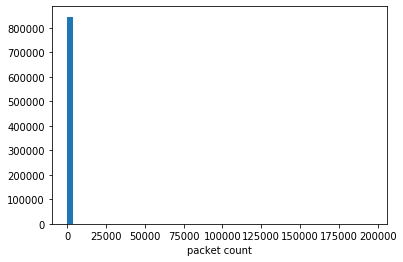

In [39]:
fig, ax = plt.subplots()
plt.hist(df['packets'].values, bins = 50)
ax.set_xlabel('packet count')
plt.show()

# Almost all the packet counts seem to be in a very restricted range of small values. Let's include only a certain interval
# and zoom in a bit.

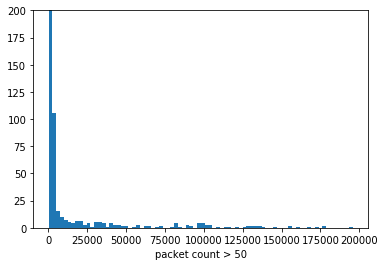

In [40]:
fig, ax = plt.subplots()
plt.hist(df[df['packets'] > 50]['packets'].values, bins = 80)
ax.set_xlabel('packet count > 50')
ax.set_ylim(0, 200)
plt.show()

# Very few instances of the very high packet counts.

In [41]:
print('bytes mean: ', df['bytes'].mean())
print('bytes median: ', df['bytes'].median())
print('bytes mode: ', df['bytes'].mode()[0])
print('no. bytes unique values: ', len(df['bytes'].unique()))
print('max bytes value: ', df['bytes'].max())

bytes mean:  18409.459855741927
bytes median:  152.0
bytes mode:  66
no. bytes unique values:  23284
max bytes value:  499900000


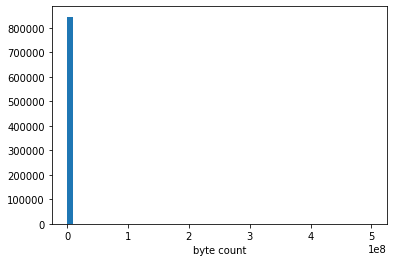

In [42]:
fig, ax = plt.subplots()
plt.hist(df['bytes'].values, bins = 50)
ax.set_xlabel('byte count')
plt.show()

# Same story as packets.

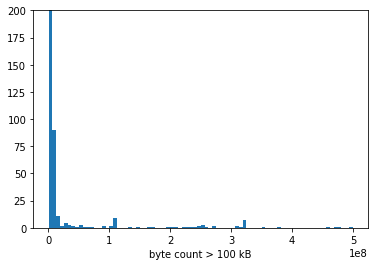

In [43]:
fig, ax = plt.subplots()
plt.hist(df[df['bytes'] > 100000]['bytes'].values, bins = 80)
ax.set_xlabel('byte count > 100 kB')
ax.set_ylim(0, 200)
plt.show()

<div class="alert alert-block alert-success">
All in all, we can see that the range of possible values for the numerical attributes is very large, although the really high values appear very infrequently, meaning the data is still very much skewed towards the smaller values.
</div>

<div class="alert alert-block alert-success">
The remaining attributes and class label 'class' are considered categorical. The port numbers and their distributions, however, may be of interest. Let's take a look at their distributions.
</div>

In [44]:
print('src_pt mode: ', df['src_pt'].mode()[0])
print('dst_pt mode: ', df['dst_pt'].mode()[0])
print('no. source port unique values: ', len(df['src_pt'].unique()))
print('no. destination port unique values: ', len(df['dst_pt'].unique()))

# Result is pretty expected, with 80 being the port mostly used by HTTP

src_pt mode:  80
dst_pt mode:  80.0
no. source port unique values:  33424
no. destination port unique values:  33467


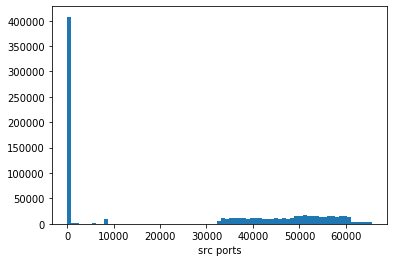

In [45]:
fig, ax = plt.subplots()
ax.hist(df['src_pt'].values, bins = 75)
ax.set_xlabel('src ports')
plt.show()

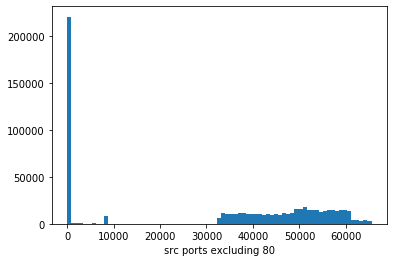

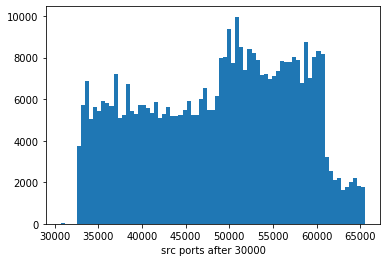

In [46]:
fig_a, ax_a = plt.subplots()
ax_a.hist(df[df['src_pt'] != 80]['src_pt'].values, bins = 75)
ax_a.set_xlabel('src ports excluding 80')
plt.show()

fig_b, ax_b = plt.subplots()
ax_b.hist(df[df['src_pt'] > 30000]['src_pt'].values, bins = 75)
ax_b.set_xlabel('src ports after 30000')
plt.show()

# Port 80 is the most commonly used, and the occurrences from around port 32000 onwards are relatively evenly distributed.
# 1024-49151 are user or registered ports, and 49152-65535 are dynamic or private ports.

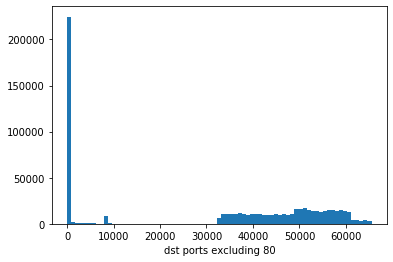

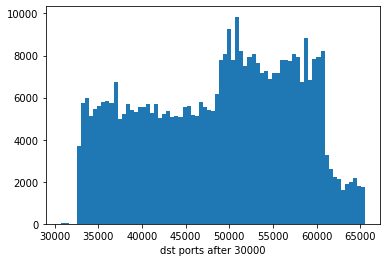

In [47]:
fig_a, ax_a = plt.subplots()
ax_a.hist(df[df['dst_pt'] != 80]['dst_pt'].values, bins = 75)
ax_a.set_xlabel('dst ports excluding 80')
plt.show()

fig_b, ax_b = plt.subplots()
ax_b.hist(df[df['dst_pt'] > 30000]['dst_pt'].values, bins = 75)
ax_b.set_xlabel('dst ports after 30000')
plt.show()

# Very similar results for dst_pt

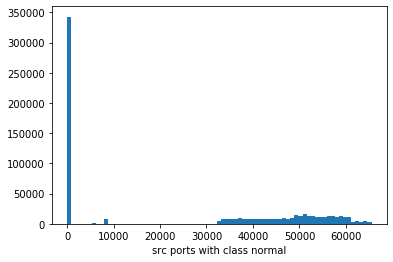

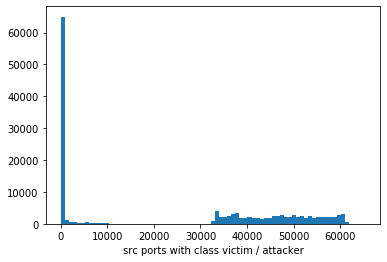

In [48]:
# What if we consider the class?

fig_a, ax_a = plt.subplots()
ax_a.hist(df[df['class'] == 'normal']['src_pt'].values, bins = 75)
ax_a.set_xlabel('src ports with class normal')
plt.show()

fig_b, ax_b = plt.subplots()
ax_b.hist(df[df['class'] != 'normal']['src_pt'].values, bins = 75)
ax_b.set_xlabel('src ports with class victim / attacker')
plt.show()

<div class="alert alert-block alert-success">
It doesn't look like the distribution differs significantly between normal and attacker/victim classes. This reinforces our idea that ports aren't going to be very useful in classification.
</div>

<div class="alert alert-block alert-success">
Now we convert the date_first_seen columns to a date-time object so we can perform further analysis.
</div>

In [49]:
df['date_first_seen'] = pd.to_datetime(df['date_first_seen'])

In [50]:
df['date_first_seen'].dtype

dtype('<M8[ns]')

In [51]:
df['day_of_week'] = df['date_first_seen'].dt.dayofweek
df['hour'] = df['date_first_seen'].dt.hour

In [52]:
df.sample(10)

,date_first_seen,duration,protocol,src_ip,src_pt,dst_ip,dst_pt,packets,flags,class,attack_type,attack_id,attack_desc,bytes,day_of_week,hour
188804,2017-03-16 10:18:46.181,0.000,TCP,10057_29,80,192.168.220.4,53823.0,1,.A....,normal,---,---,---,66,3,10
737136,2017-03-21 11:08:49.592,0.016,TCP,10704_25,80,192.168.220.4,38140.0,2,.A...F,normal,---,---,---,132,1,11
710445,2017-03-21 08:53:13.669,0.004,UDP,192.168.220.9,58914,DNS,53.0,2,......,normal,---,---,---,158,1,8
659037,2017-03-20 16:12:26.980,0.196,TCP,10902_202,443,192.168.220.16,50535.0,2,.AP...,normal,---,---,---,2668,0,16
272354,2017-03-16 16:39:02.699,0.000,UDP,192.168.220.16,57880,DNS,53.0,2,......,normal,---,---,---,144,3,16
542514,2017-03-20 09:04:14.657,0.005,UDP,DNS,53,192.168.220.9,52791.0,2,......,normal,---,---,---,244,0,9
559432,2017-03-20 09:37:08.267,0.000,TCP,10174_55,80,192.168.200.8,64028.0,3,.AP...,normal,---,---,---,3798,0,9
372322,2017-03-17 13:06:05.689,0.003,TCP,192.168.220.16,45200,192.168.100.6,80.0,6,.AP.SF,attacker,dos,16,10000 connections on 192.168.100.6:80,545,4,13
620275,2017-03-20 12:27:18.190,0.001,TCP,192.168.100.6,80,192.168.220.16,48047.0,4,.A..SF,victim,dos,31,10000 connections on 192.168.100.6:80,272,0,12
757804,2017-03-21 12:45:12.521,0.000,TCP,192.168.200.4,49425,12663_172,443.0,1,.A....,normal,---,---,---,54,1,12


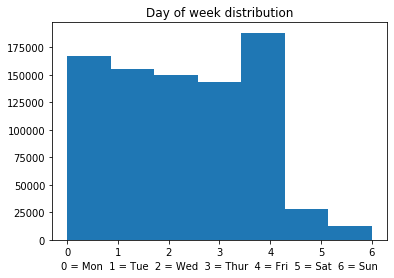

In [53]:
fig, ax = plt.subplots()
ax.hist(df['day_of_week'].values, bins = 7)
ax.set_title('Day of week distribution')
ax.set_xlabel('0 = Mon  1 = Tue  2 = Wed  3 = Thur  4 = Fri  5 = Sat  6 = Sun')
plt.show()

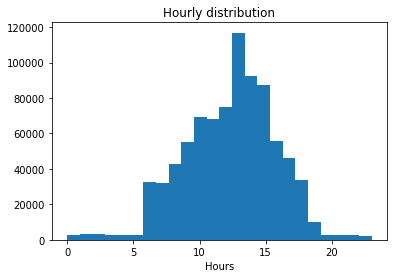

In [54]:
fig, ax = plt.subplots()
ax.hist(df['hour'].values, bins = 24)
ax.set_title('Hourly distribution')
ax.set_xlabel('Hours')
plt.show()

<div class="alert alert-block alert-success">
Traffic flows mostly during weekdays and daytime hours, with a peak at 13. What if we only consider attacks?
</div>

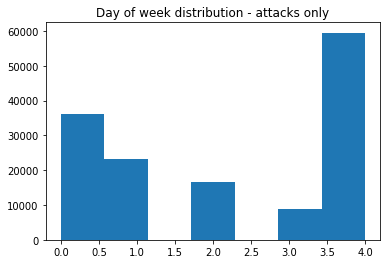

In [55]:
fig, ax = plt.subplots()
ax.hist(df[df['class'] != 'normal']['day_of_week'].values, bins = 7)
ax.set_title('Day of week distribution - attacks only')
plt.show()

# Bins are scaled down to 4 for some reason - why is that?

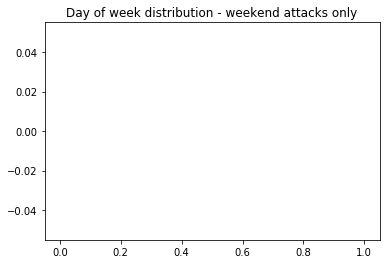

In [56]:
fig, ax = plt.subplots()
ax.hist(df[(df['class'] != 'normal') & (df['day_of_week'] > 4)]['day_of_week'].values, bins = 1)
ax.set_title('Day of week distribution - weekend attacks only')
plt.show()

# It turns out there are no recorded attacks on weekends.

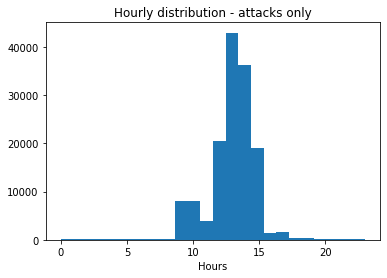

In [57]:
fig, ax = plt.subplots()
ax.hist(df[df['class'] != 'normal']['hour'].values, bins = 24)
ax.set_title('Hourly distribution - attacks only')
ax.set_xlabel('Hours')
plt.show()

<div class="alert alert-block alert-success">
Day of the week should theoretically affect the outcome of seeing an attack, as there are none recorded on any Saturday and Sunday. Attacks are also mostly absent between the evening and early morning.
</div>

## Part 3: Classification

<div class="alert alert-block alert-success">
Now it's time we trained some classifiers. First, we will use only numeric attributes to predict the class.
</div>

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [60]:
import time

In [61]:
file_path_2 = "C:/Users/Bearson/Desktop/Cyber Risk material/Artificial Intelligence for Security/data/data/NetworkTraffic/CIDDS-001-internal-week2_10pcSample.csv"
df_test = pd.read_csv(file_path_2, header = 0)

C:\Users\Bearson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
df_test = df_test.rename({'Date first seen': 'date_first_seen', 'Duration': 'duration', 'Proto': 'protocol', 'Src IP Addr': 'src_ip',
                'Src Pt': 'src_pt', 'Dst IP Addr': 'dst_ip', 'Dst Pt': 'dst_pt', 'Packets': 'packets', 'Flags': 'flags',
                'attackType': 'attack_type', 'attackID': 'attack_id', 'attackDescription': 'attack_desc'}, axis=1)

In [63]:
df_test = df_test.drop(['Unnamed: 0', 'Flows', 'Tos'], axis = 1)

In [64]:
conv_2 = []
for val in df_test['Bytes']:
    if isinstance(val, int):
        conv_2.append(val)
    else:
        val = val.replace(" ", "")
        if "M" in val:
            val = val.replace("M", "")
            val = val.replace(".", "")
            val = int(val) * 100000
        else:
            val = int(val)
        conv_2.append(val)

In [65]:
df_test = df_test.drop('Bytes', axis = 1)
new_bytes_2 = pd.DataFrame({'bytes' : conv_2})
df_test = pd.concat([df_test, new_bytes_2], axis = 1)

In [66]:
df_test['bytes'].dtype

dtype('int64')

<div class="alert alert-block alert-success">
We will start by training our classifiers using the first week dataset, predicting the labels of the split test data, and seeing how well the resulting model performs in terms of just accuracy (for non-binary classification, precision and recall metrics work a little differently). Afterwards, we will use that same model only to predict the labels of the second week dataset.
</div>

In [67]:
def prediction(model, X_test):
    return model.predict(X_test)

# Please note the order of the columns in the 'labels' parameter
def evaluate(prediction, y_test):
    a = accuracy_score(prediction, y_test)
    c = confusion_matrix(y_test, prediction, labels=['normal', 'attacker', 'victim'])
    print("Accuracy:", a, "\nConfusion matrix:\n", c)

def train_logistic_regression(X_train, y_train):
    lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
    t0 = time.time()
    lr.fit(X_train, y_train)
    print("time to train = %.2f" % (time.time()-t0))
    return lr

def train_naive_bayes(X_train, y_train):
    nb = GaussianNB()
    t0 = time.time()
    nb.fit(X_train, y_train)
    print("time to train = %.2f" % (time.time()-t0))
    return nb

def train_decision_tree(X_train, y_train):
    dt = DecisionTreeClassifier()
    t0 = time.time()
    dt.fit(X_train, y_train)
    print("time to train = %.2f" % (time.time()-t0))
    return dt

def train_random_forest(X_train, y_train):
    rf = RandomForestClassifier(n_estimators = 20)
    t0 = time.time()
    rf.fit(X_train, y_train)
    print("time to train = %.2f" % (time.time()-t0))
    return rf

def train_svm(X_train, y_train):
    svm = SVC()
    t0 = time.time()
    svm.fit(X_train, y_train)
    print("time to train = %.2f" % (time.time()-t0))
    return svm

In [68]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(df[['duration', 'packets', 'bytes']],
                                                          df['class'], test_size = 0.2)

In [69]:
X_test_w2 = df_test[['duration', 'packets', 'bytes']]
y_test_w2 = df_test['class']

In [70]:
print("LOGISTIC REGRESSION\n")
print("Training dataset performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training dataset performance:


C:\Users\Bearson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


time to train = 27.70
Accuracy: 0.8282977678650661 
Confusion matrix:
 [[140008      0     20]
 [ 15063      0      0]
 [ 13940      0      0]]

Test dataset performance:
Accuracy: 0.8260579027867087 
Confusion matrix:
 [[851726      0     76]
 [ 91009      0      0]
 [ 88262      0      0]]


In [71]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 2.57
Accuracy: 0.26120060817246543 
Confusion matrix:
 [[ 17619  20212 102197]
 [     5  12607   2451]
 [    10      5  13925]]

Test dataset performance:
Accuracy: 0.2687685546998127 
Confusion matrix:
 [[103530 124251 624021]
 [    24  85392   5593]
 [    31     33  88198]]


<div class="alert alert-block alert-success">
Initial results are quite poor: logistic regression has predicted normal nearly every single time, and Naive Bayes has made very inaccurate predictions.
</div>

In [72]:
print("DECISION TREE\n")
print("Training data performance:")
decision_tree = train_decision_tree(X_train, y_train)
evaluate(prediction(decision_tree, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate(prediction(decision_tree, X_test_w2), y_test_w2)

DECISION TREE

Training data performance:
time to train = 3.23
Accuracy: 0.9904751199484119 
Confusion matrix:
 [[139878    133     17]
 [   112  14951      0]
 [  1267     81  12592]]

Test dataset performance:
Accuracy: 0.9954658884482476 
Confusion matrix:
 [[851012    699     91]
 [   682  90327      0]
 [  3106     97  85059]]


In [73]:
print("RANDOM FOREST\n")
print("Training data performance:")
random_forest = train_random_forest(X_train, y_train)
evaluate(prediction(random_forest, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate(prediction(random_forest, X_test_w2), y_test_w2)

RANDOM FOREST

Training data performance:
time to train = 17.07
Accuracy: 0.9905520289177725 
Confusion matrix:
 [[139894    126      8]
 [   114  14949      0]
 [  1268     81  12591]]

Test dataset performance:
Accuracy: 0.9955221405273923 
Confusion matrix:
 [[851076    660     66]
 [   682  90327      0]
 [  3112     97  85053]]


<div class="alert alert-block alert-success">
The decision tree and random forest classifiers perform quite well in terms of accuracy.    
</div>

<div class="alert alert-block alert-success">
Here we instead try to predict the binary class (where 'normal' is mapped to 0 and 'attacker' and 'victim' are mapped to 1). The technical report doesn't really make a huge distinction between attacker and victim, so throughout the rest of the notebook we stick to binary classification unless otherwise specified.
</div>

In [74]:
df['class_bin'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

In [75]:
df_test['class_bin'] = df_test['class'].apply(lambda x: 0 if x == 'normal' else 1)

In [76]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(df[['duration', 'packets', 'bytes']],
                                                          df['class_bin'], test_size = 0.2)

In [77]:
X_test_w2 = df_test[['duration', 'packets', 'bytes']]
y_test_w2 = df_test['class_bin']

In [78]:
def evaluate_binary(prediction, y_test):
    a = accuracy_score(prediction, y_test)
    p = precision_score(prediction, y_test)
    r = recall_score(prediction, y_test)
    c = confusion_matrix(y_test, prediction, labels=[0, 1])
    print("Accuracy: ", a, "\nPrecision: ", p, "\nRecall: ", r, "\nConfusion matrix:\n", c)

In [79]:
print("LOGISTIC REGRESSION\n")
print("Training data performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate_binary(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training data performance:
time to train = 14.10
Accuracy:  0.8297176257609551 
Precision:  0.0 
Recall:  0.0 
Confusion matrix:
 [[140248      1]
 [ 28782      0]]

Test dataset performance:
Accuracy:  0.8261287028173563 
Precision:  0.0 
Recall:  0.0 
Confusion matrix:
 [[851799      3]
 [179271      0]]


<div class="alert alert-block alert-success">
Still poor performance with logistic regression - it's pretty much only predicting 0 (benign) for every row. Since there are no true positive instances - i.e. 1 is predicted for the actually malign rows - precision and recall are 0.
</div>

In [80]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate_binary(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 0.24
Accuracy:  0.27178446557140407 
Precision:  0.9994440970050726 
Recall:  0.18944817275966308 
Confusion matrix:
 [[ 17174 123075]
 [    16  28766]]

Test dataset performance:
Accuracy:  0.2711369612044928 
Precision:  0.9996932019121888 
Recall:  0.19256623171213919 
Confusion matrix:
 [[100346 751456]
 [    55 179216]]


<div class="alert alert-block alert-success">
Naive Bayes isn't doing so well in terms of accuracy, but it has found very few false positives.
</div>

In [81]:
print("DECISION TREE\n")
print("Training data performance:")
decision_tree = train_decision_tree(X_train, y_train)
evaluate_binary(prediction(decision_tree, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(decision_tree, X_test_w2), y_test_w2)

DECISION TREE

Training data performance:
time to train = 1.27
Accuracy:  0.9907472593784572 
Precision:  0.9500729622680842 
Recall:  0.9953771112405359 
Confusion matrix:
 [[140122    127]
 [  1437  27345]]

Test dataset performance:
Accuracy:  0.9955589953378665 
Precision:  0.9789090259997434 
Recall:  0.9954733163913596 
Confusion matrix:
 [[851004    798]
 [  3781 175490]]


In [82]:
print("RANDOM FOREST\n")
print("Training data performance:")
random_forest = train_random_forest(X_train, y_train)
evaluate_binary(prediction(random_forest, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(random_forest, X_test_w2), y_test_w2)

RANDOM FOREST

Training data performance:
time to train = 15.69
Accuracy:  0.9908123361986855 
Precision:  0.9500729622680842 
Recall:  0.9957758275372346 
Confusion matrix:
 [[140133    116]
 [  1437  27345]]

Test dataset performance:
Accuracy:  0.9956327049588147 
Precision:  0.9788588226762834 
Recall:  0.9959533241767597 
Confusion matrix:
 [[851089    713]
 [  3790 175481]]


<div class="alert alert-block alert-success">
Both the decision tree and random forest classifiers remain quite accurate, although the random forest is not really achieving better results than the decision tree while being more computationally intensive. We will nevertheless continue to include the random forest classifier results as they may change further down the line.
</div>

<div class="alert alert-block alert-success">
Downsampling the majority class might help the poorer classifiers perform better. Let's try it out.
</div>

In [83]:
majority = df[df['class_bin'] == 0]
minority = df[df['class_bin'] == 1]

majority_ds = resample(majority, replace = False, n_samples = 150000)
df_ds = pd.concat([majority_ds, minority])

In [84]:
df_ds['class_bin'].value_counts()

0    150000
1    144639
Name: class_bin, dtype: int64

In [85]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(df_ds[['duration', 'packets', 'bytes']],
                                                          df_ds['class_bin'], test_size = 0.2)

In [86]:
X_test_w2 = df_test[['duration', 'packets', 'bytes']]
y_test_w2 = df_test['class_bin']

In [87]:
print("LOGISTIC REGRESSION\n")
print("Training data performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate_binary(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training data performance:
time to train = 2.63
Accuracy:  0.4248235134401303 
Precision:  0.5628668093627011 
Recall:  0.43435635123614663 
Confusion matrix:
 [[ 8730 21232]
 [12662 16304]]

Test dataset performance:
Accuracy:  0.32973320026807024 
Precision:  0.5224325183660492 
Recall:  0.13396086889980074 
Confusion matrix:
 [[246322 605480]
 [ 85614  93657]]


<div class="alert alert-block alert-success">
Although logistic regression's accuracy has dropped significantly, its precision and recall values at least aren't close to 0, meaning the model has actually learned to predict a portion of the malicious instances correctly.
</div>

In [88]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate_binary(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 0.09
Accuracy:  0.5496368449633451 
Precision:  0.9992404888489954 
Recall:  0.5218802401687672 
Confusion matrix:
 [[ 3445 26517]
 [   22 28944]]

Test dataset performance:
Accuracy:  0.2674505102936455 
Precision:  0.9996932019121888 
Recall:  0.19178296216156057 
Confusion matrix:
 [[ 96545 755257]
 [    55 179216]]


<div class="alert alert-block alert-success">
Naive Bayes' performance has improved in every aspect on the training data. However, this improvement hasn't carried over to the test dataset - the model may not have generalized well.
</div>

In [89]:
print("DECISION TREE\n")
print("Training data performance:")
decision_tree = train_decision_tree(X_train, y_train)
evaluate_binary(prediction(decision_tree, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(decision_tree, X_test_w2), y_test_w2)

DECISION TREE

Training data performance:
time to train = 0.41
Accuracy:  0.9748676350800978 
Precision:  0.9959953048401574 
Recall:  0.9548237630316068 
Confusion matrix:
 [[28597  1365]
 [  116 28850]]

Test dataset performance:
Accuracy:  0.966778297947866 
Precision:  0.994996402095152 
Recall:  0.8424557575414087 
Confusion matrix:
 [[818445  33357]
 [   897 178374]]


<div class="alert alert-block alert-success">
Recall has worsened for the decision tree classifier - perhaps the larger amount of data is more beneficial to performance?
</div>

<div class="alert alert-block alert-success">
Before we run a support vector machine classifier, let's also scale our data for training. Please note that on previous attempts we found scaling the numeric attributes not to be very beneficial to classifier performance in general, however in this case it's necessary. Also, prediction (in addition to training) with SVMs is computationally intensive, so we will limit ourselves to just predicting the split first-week data for the time being.
</div>

In [90]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test_w1 = scaler.transform(X_test_w1)

In [91]:
print("SUPPORT VECTOR MACHINE\n")
print("Training data performance:")
svm = train_svm(X_train, y_train)
evaluate_binary(prediction(svm, X_test_w1), y_test_w1)

# print("\nTest dataset performance:")
# evaluate_binary(prediction(svm, X_test_w2), y_test_w2)

SUPPORT VECTOR MACHINE

Training data performance:
time to train = 2674.25
Accuracy:  0.6576160738528374 
Precision:  0.9959262583718843 
Recall:  0.5898662740768004 
Confusion matrix:
 [[ 9904 20058]
 [  118 28848]]


<div class="alert alert-block alert-success">
What if we tried predicting the attack type instead? Let's continue using downsampling, as we've previously seen how unbalanced this column is.
</div>

In [92]:
majority_noatt = df[df['attack_type'] == '---']
majority_att = df[df['attack_type'] == 'dos']
minority_att = df[(df['attack_type'] != '---') & (df['attack_type'] != 'dos')]

majority_noatt_ds = resample(majority_noatt, replace = False, n_samples = 40000)
majority_att_ds = resample(majority_att, replace = False, n_samples = 20000)
df_ds_att = pd.concat([majority_noatt_ds, majority_att_ds, minority_att])

In [93]:
df_ds_att['attack_type'].value_counts()

---           40000
dos           20000
portScan      18686
pingScan        355
bruteForce      168
Name: attack_type, dtype: int64

In [94]:
def evaluate_att(prediction, y_test):
    a = accuracy_score(prediction, y_test)
    c = confusion_matrix(y_test, prediction, labels=['---', 'dos', 'portScan', 'pingScan', 'bruteForce'])
    print("Accuracy:", a, "\nConfusion matrix:\n", c)

In [95]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(df_ds_att[['duration', 'packets', 'bytes']],
                                                          df_ds_att['attack_type'], test_size = 0.2)

In [96]:
X_test_w2 = df_test[['duration', 'packets', 'bytes']]
y_test_w2 = df_test['attack_type']

In [97]:
print("LOGISTIC REGRESSION\n")
print("Training data performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate_att(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training data performance:


C:\Users\Bearson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


time to train = 3.08
Accuracy: 0.6903800025249337 
Confusion matrix:
 [[7251    4  653    0    0]
 [4023    0    0    0    0]
 [ 126    0 3686    0    0]
 [  19    0   44    0    0]
 [  36    0    0    0    0]]

Test dataset performance:
Accuracy: 0.7700861141742631 
Confusion matrix:
 [[786388    162  65248      4      0]
 [170512      0      0      0      0]
 [   515      0   7627      0      0]
 [   108      0    149      0      0]
 [   337      0     23      0      0]]


<div class="alert alert-block alert-success">
Logistic regression is struggling to detect the actual DoS attacks.
</div>

In [98]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate_att(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 0.23
Accuracy: 0.5172326726423432 
Confusion matrix:
 [[ 354 1876 4777  525  376]
 [   0 4022    1    0    0]
 [   1    8 3801    1    1]
 [   0    0   62    1    0]
 [   0    4   16    0   16]]

Test dataset performance:
Accuracy: 0.2104584253491266 
Confusion matrix:
 [[ 38506 207320 510349  56538  39089]
 [     1 170496     15      0      0]
 [     3    162   7962      5     10]
 [     4     13    238      1      1]
 [     0     37    290      0     33]]


In [99]:
print("DECISION TREE\n")
print("Training data performance:")
decision_tree = train_decision_tree(X_train, y_train)
evaluate_att(prediction(decision_tree, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(decision_tree, X_test_w2), y_test_w2)

DECISION TREE

Training data performance:
time to train = 0.24
Accuracy: 0.9691326852670118 
Confusion matrix:
 [[7507    3  383    3   12]
 [   1 4022    0    0    0]
 [  26    0 3784    2    0]
 [   1    0   42   20    0]
 [  16    0    0    0   20]]

Test dataset performance:
Accuracy: 0.9616700272434638 
Confusion matrix:
 [[813196    514  36956    188    948]
 [    84 170420      3      0      5]
 [   303      0   7838      0      1]
 [    34      0    189     34      0]
 [   273      0     23      0     64]]


In [100]:
print("RANDOM FOREST\n")
print("Training data performance:")
random_forest = train_random_forest(X_train, y_train)
evaluate_att(prediction(random_forest, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(random_forest, X_test_w2), y_test_w2)

RANDOM FOREST

Training data performance:
time to train = 0.99
Accuracy: 0.97020578209822 
Confusion matrix:
 [[7526    1  378    0    3]
 [   1 4022    0    0    0]
 [  27    0 3785    0    0]
 [   2    0   42   19    0]
 [  18    0    0    0   18]]

Test dataset performance:
Accuracy: 0.9631335511646605 
Confusion matrix:
 [[814725    312  36483      1    281]
 [   101 170411      0      0      0]
 [   309      0   7833      0      0]
 [    37      0    186     34      0]
 [   278      0     24      0     58]]


<div class="alert alert-block alert-success">
The remaining three classifiers aren't doing an exceptional job either, with Naive Bayes in particular misclassifying a large amount of no-attack points.
</div>

<div class="alert alert-block alert-success">
As for the not-downsampled dataset:
</div>

In [101]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(df[['duration', 'packets', 'bytes']],
                                                          df['attack_type'], test_size = 0.2)

In [102]:
X_test_w2 = df_test[['duration', 'packets', 'bytes']]
y_test_w2 = df_test['attack_type']

In [103]:
print("LOGISTIC REGRESSION\n")
print("Training data performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate_att(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training data performance:


C:\Users\Bearson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


time to train = 49.28
Accuracy: 0.8295046470765718 
Confusion matrix:
 [[140212      9      1      0      0]
 [ 24991      0      0      0      0]
 [  3700      0      0      0      0]
 [    80      0      0      0      0]
 [    38      0      0      0      0]]

Test dataset performance:
Accuracy: 0.8260831192359804 
Confusion matrix:
 [[851752     49      0      1      0]
 [170512      0      0      0      0]
 [  8142      0      0      0      0]
 [   257      0      0      0      0]
 [   360      0      0      0      0]]


In [104]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate_att(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 2.57
Accuracy: 0.19536061432518295 
Confusion matrix:
 [[  8016 118975   2200      0  11031]
 [     0  24991      0      0      0]
 [     0   3699      0      0      1]
 [     1     77      0      0      2]
 [     0     23      0      0     15]]

Test dataset performance:
Accuracy: 0.21264837698203715 
Confusion matrix:
 [[ 48711 723832  16409      0  62850]
 [     1 170511      0      0      0]
 [     4   8124      1      0     13]
 [     5    251      1      0      0]
 [     0    327      0      0     33]]


<div class="alert alert-block alert-success">
We can immediately see the performance is poorer with the not-downsampled data.
</div>

<div class="alert alert-block alert-success">
Now, let's add the day of week and hour values as features. To handle the days of the week, we'd like a binary feature where we have weekdays (Mon through Fri) as 0 and weekends (Sat and Sun) as 1, considering the previously seen distribution in the data. Hours can be numeric and we have used a sine and cosine transform to reflect their cyclical nature. After all, it doesn't really make sense that 23 (11 p.m.) should be 23 units away from 0 (12 a.m.).
</div>

In [105]:
conv_days = []
for day in df['day_of_week']:
    if day == 5 or day == 6:
        conv_days.append(1)
    else:
        conv_days.append(0)

In [106]:
days_mapping = pd.DataFrame({'weekday_or_weekend' : conv_days})
df = pd.concat([df, days_mapping], axis = 1)

In [107]:
df['sin_hr'] = df['hour'].apply(lambda hr: np.sin(hr*(2.*np.pi/24)))
df['cos_hr'] = df['hour'].apply(lambda hr: np.cos(hr*(2.*np.pi/24)))

In [108]:
df['sin_hr'].value_counts()

-2.588190e-01    116806
-5.000000e-01     92563
-7.071068e-01     87201
 1.224647e-16     75155
 5.000000e-01     69192
 2.588190e-01     67922
 7.071068e-01     58191
-8.660254e-01     55749
-9.659258e-01     45890
 8.660254e-01     42921
-1.000000e+00     33667
 1.000000e+00     32385
 9.659258e-01     32283
-9.659258e-01     10017
 5.000000e-01      3144
 2.588190e-01      3104
 0.000000e+00      2947
 9.659258e-01      2926
-8.660254e-01      2883
 8.660254e-01      2755
-5.000000e-01      2628
-7.071068e-01      2458
-2.588190e-01      2365
Name: sin_hr, dtype: int64

In [109]:
df['cos_hr'].value_counts()

-9.659258e-01    116806
-8.660254e-01     92563
-7.071068e-01     87201
-1.000000e+00     75155
-8.660254e-01     69192
-9.659258e-01     67922
-5.000000e-01     55749
-7.071068e-01     55217
-2.588190e-01     45890
-5.000000e-01     42921
-1.836970e-16     33667
 6.123234e-17     32385
-2.588190e-01     32283
 2.588190e-01     10017
 8.660254e-01      3144
 9.659258e-01      3104
 7.071068e-01      2974
 1.000000e+00      2947
 2.588190e-01      2926
 5.000000e-01      2883
 5.000000e-01      2755
 8.660254e-01      2628
 7.071068e-01      2458
 9.659258e-01      2365
Name: cos_hr, dtype: int64

In [110]:
majority = df[df['class_bin'] == 0]
minority = df[df['class_bin'] == 1]

majority_ds = resample(majority, replace = False, n_samples = 150000)
df_ds = pd.concat([majority_ds, minority])

In [111]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(df_ds[['duration', 'packets', 'bytes', 'weekday_or_weekend',
                                                                 'sin_hr', 'cos_hr']],
                                                          df_ds['class_bin'], test_size = 0.2)

In [112]:
df_test['date_first_seen'] = pd.to_datetime(df_test['date_first_seen'])
df_test['day_of_week'] = df_test['date_first_seen'].dt.dayofweek
df_test['hour'] = df_test['date_first_seen'].dt.hour

In [113]:
conv_days_2 = []
for day in df_test['day_of_week']:
    if day == 5 or day == 6:
        conv_days_2.append(1)
    else:
        conv_days_2.append(0)

In [114]:
days_mapping_2 = pd.DataFrame({'weekday_or_weekend' : conv_days_2})
df_test = pd.concat([df_test, days_mapping_2], axis = 1)

In [115]:
df_test['sin_hr'] = df_test['hour'].apply(lambda hr: np.sin(hr*(2.*np.pi/24)))
df_test['cos_hr'] = df_test['hour'].apply(lambda hr: np.cos(hr*(2.*np.pi/24)))

In [116]:
X_test_w2 = df_test[['duration', 'packets', 'bytes', 'weekday_or_weekend', 'sin_hr', 'cos_hr']]
y_test_w2 = df_test['class_bin']

In [117]:
print("LOGISTIC REGRESSION\n")
print("Training data performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate_binary(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training data performance:
time to train = 1.69
Accuracy:  0.5136437686668477 
Precision:  0.5358294331773271 
Recall:  0.5030103817489504 
Confusion matrix:
 [[14812 15271]
 [13389 15456]]

Test dataset performance:
Accuracy:  0.523797054136807 
Precision:  0.5206419331626421 
Recall:  0.18727089231361896 
Confusion matrix:
 [[446737 405065]
 [ 85935  93336]]


In [118]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate_binary(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 0.12
Accuracy:  0.548958050502308 
Precision:  0.9995493153059456 
Recall:  0.5204520018773241 
Confusion matrix:
 [[ 3517 26566]
 [   13 28832]]

Test dataset performance:
Accuracy:  0.26803145849033 
Precision:  0.9996932019121888 
Recall:  0.19190597446764768 
Confusion matrix:
 [[ 97144 754658]
 [    55 179216]]


In [119]:
print("DECISION TREE\n")
print("Training data performance:")
decision_tree = train_decision_tree(X_train, y_train)
evaluate_binary(prediction(decision_tree, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(decision_tree, X_test_w2), y_test_w2)

DECISION TREE

Training data performance:
time to train = 0.62
Accuracy:  0.9844895465653001 
Precision:  0.9876581729935864 
Recall:  0.9807897545357525 
Confusion matrix:
 [[29525   558]
 [  356 28489]]

Test dataset performance:
Accuracy:  0.9583880093843986 
Precision:  0.8379380937240267 
Recall:  0.9155726214420674 
Confusion matrix:
 [[837950  13852]
 [ 29053 150218]]


In [120]:
print("RANDOM FOREST\n")
print("Training data performance:")
random_forest = train_random_forest(X_train, y_train)
evaluate_binary(prediction(random_forest, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(random_forest, X_test_w2), y_test_w2)

RANDOM FOREST

Training data performance:
time to train = 4.72
Accuracy:  0.9847610643497149 
Precision:  0.9875888368868088 
Recall:  0.9813966307231199 
Confusion matrix:
 [[29543   540]
 [  358 28487]]

Test dataset performance:
Accuracy:  0.9588283273832212 
Precision:  0.8372742942249444 
Recall:  0.9187222269828251 
Confusion matrix:
 [[838523  13279]
 [ 29172 150099]]


<div class="alert alert-block alert-success">
Our assumptions about the distribution of attacks in the first week don't seem to hold for the second week, given the poorer overall performance on the test set.
</div>

<div class="alert alert-block alert-success">
We will now use the code in the appendix to split the 'flags' column based on the characters the values contain.
</div>

In [121]:
df["flag_1"] = [x[0] for x in df["flags"]]
df["flag_2"] = [x[1] for x in df["flags"]]
df["flag_3"] = [x[2] for x in df["flags"]]
df["flag_4"] = [x[3] for x in df["flags"]]
df["flag_5"] = [x[4] for x in df["flags"]]
df["flag_6"] = [x[5] for x in df["flags"]]

In [128]:
df['flag_1'].value_counts()
# Only one possible value: won't be considered as a feature

.    845152
Name: flag_1, dtype: int64

In [123]:
df['flag_2'].value_counts()

A    722759
.    122393
Name: flag_2, dtype: int64

In [124]:
df['flag_3'].value_counts()

.    541142
P    304010
Name: flag_3, dtype: int64

In [125]:
df['flag_4'].value_counts()

.    826408
R     18744
Name: flag_4, dtype: int64

In [126]:
df['flag_5'].value_counts()

.    580017
S    265135
Name: flag_5, dtype: int64

In [127]:
df['flag_6'].value_counts()

.    606512
F    238640
Name: flag_6, dtype: int64

In [129]:
df_1h = pd.get_dummies(df, columns = ['flag_2', 'flag_3', 'flag_4', 'flag_5', 'flag_6'])

In [130]:
df_1h.columns

Index(['date_first_seen', 'duration', 'protocol', 'src_ip', 'src_pt', 'dst_ip',
       'dst_pt', 'packets', 'flags', 'class', 'attack_type', 'attack_id',
       'attack_desc', 'bytes', 'day_of_week', 'hour', 'class_bin',
       'weekday_or_weekend', 'sin_hr', 'cos_hr', 'flag_1', 'flag_2_.',
       'flag_2_A', 'flag_3_.', 'flag_3_P', 'flag_4_.', 'flag_4_R', 'flag_5_.',
       'flag_5_S', 'flag_6_.', 'flag_6_F'],
      dtype='object')

In [131]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(
                                df_1h[['packets', 'duration', 'bytes', 'weekday_or_weekend', 'sin_hr', 'cos_hr',
                                       'flag_2_.', 'flag_2_A', 'flag_3_.', 'flag_3_P', 'flag_4_.', 'flag_4_R', 'flag_5_.',
                                       'flag_5_S', 'flag_6_.', 'flag_6_F']],
                                df_1h['class_bin'], test_size=0.2)

In [132]:
df_test["flag_1"] = [x[0] for x in df_test["flags"]]
df_test["flag_2"] = [x[1] for x in df_test["flags"]]
df_test["flag_3"] = [x[2] for x in df_test["flags"]]
df_test["flag_4"] = [x[3] for x in df_test["flags"]]
df_test["flag_5"] = [x[4] for x in df_test["flags"]]
df_test["flag_6"] = [x[5] for x in df_test["flags"]]

In [133]:
df_test_1h = pd.get_dummies(df_test, columns = ['flag_2', 'flag_3', 'flag_4', 'flag_5', 'flag_6'])

In [134]:
df_test_1h.columns

Index(['date_first_seen', 'duration', 'protocol', 'src_ip', 'src_pt', 'dst_ip',
       'dst_pt', 'packets', 'flags', 'class', 'attack_type', 'attack_id',
       'attack_desc', 'bytes', 'class_bin', 'day_of_week', 'hour',
       'weekday_or_weekend', 'sin_hr', 'cos_hr', 'flag_1', 'flag_2_.',
       'flag_2_A', 'flag_3_.', 'flag_3_P', 'flag_4_.', 'flag_4_R', 'flag_5_.',
       'flag_5_S', 'flag_6_.', 'flag_6_F'],
      dtype='object')

In [135]:
X_test_w2 = df_test_1h[['packets', 'duration', 'bytes', 'weekday_or_weekend', 'sin_hr', 'cos_hr', 'flag_2_.', 'flag_2_A',
                        'flag_3_.', 'flag_3_P', 'flag_4_.', 'flag_4_R', 'flag_5_.', 'flag_5_S', 'flag_6_.', 'flag_6_F']]
y_test_w2 = df_test_1h['class_bin']

In [136]:
print("LOGISTIC REGRESSION\n")
print("Training data performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate_binary(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training data performance:
time to train = 69.57
Accuracy:  0.9788322852021227 
Precision:  0.938322482338274 
Recall:  0.9378028520005538 
Confusion matrix:
 [[138358   1797]
 [  1781  27095]]

Test dataset performance:
Accuracy:  0.9864956215515294 
Precision:  0.9758522014157337 
Recall:  0.9480050071259423 
Confusion matrix:
 [[842207   9595]
 [  4329 174942]]


In [137]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate_binary(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 0.58
Accuracy:  0.2730800859014027 
Precision:  0.9996883224823383 
Recall:  0.1902524220655111 
Confusion matrix:
 [[ 17292 122863]
 [     9  28867]]

Test dataset performance:
Accuracy:  0.2713260845740311 
Precision:  0.9996932019121888 
Recall:  0.19260658780388984 
Confusion matrix:
 [[100541 751261]
 [    55 179216]]


In [138]:
print("DECISION TREE\n")
print("Training data performance:")
decision_tree = train_decision_tree(X_train, y_train)
evaluate_binary(prediction(decision_tree, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(decision_tree, X_test_w2), y_test_w2)

DECISION TREE

Training data performance:
time to train = 2.47
Accuracy:  0.9972194449538841 
Precision:  0.9934894029643995 
Recall:  0.9902657921988264 
Confusion matrix:
 [[139873    282]
 [   188  28688]]

Test dataset performance:
Accuracy:  0.9702407104055678 
Precision:  0.8388250191051536 
Recall:  0.9882366084630702 
Confusion matrix:
 [[850012   1790]
 [ 28894 150377]]


In [139]:
print("RANDOM FOREST\n")
print("Training data performance:")
random_forest = train_random_forest(X_train, y_train)
evaluate_binary(prediction(random_forest, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(random_forest, X_test_w2), y_test_w2)

RANDOM FOREST

Training data performance:
time to train = 21.31
Accuracy:  0.9973141021469435 
Precision:  0.993558664634991 
Recall:  0.9907452172111334 
Confusion matrix:
 [[139887    268]
 [   186  28690]]

Test dataset performance:
Accuracy:  0.9703755214228285 
Precision:  0.8390202542519426 
Recall:  0.9889150416179042 
Confusion matrix:
 [[850116   1686]
 [ 28859 150412]]


<div class="alert alert-block alert-success">
Logistic regression has improved a lot while Naive Bayes is now worse even on the training set. At this point we suspect the numeric attributes have been contributing negatively to performance (possibly due to overfitting), or at the very least holding back the model overall, so we opt to start using just categorical features from now on.
</div>

<div class="alert alert-block alert-success">
The IP address might be very relevant in this analysis, so we will use the code provided to us to split both the source IP and destination IP columns based on IP category. We will also add the protocol type as a categorical variable.
</div>

In [140]:
def get_IP_category(ip_addr):
    if ip_addr == 'DNS':
        return 'DNS'
    elif ip_addr == 'EXT_SERVER':
        return 'EXT_SERVER'
    elif len(ip_addr.split('.')) == 4:
        return 'private'
    elif len(ip_addr.split('_')) == 2:
        return 'public'
    else:
        return '-'

In [141]:
categs_src = []
for ip in df['src_ip']:
    categs_src.append(get_IP_category(ip))
    
categs_dst = []
for ip in df['dst_ip']:
    categs_dst.append(get_IP_category(ip))

In [142]:
mapped_src_ips = pd.DataFrame({'src_ip_categories' : categs_src})
df = pd.concat([df, mapped_src_ips], axis = 1)

mapped_dst_ips = pd.DataFrame({'dst_ip_categories' : categs_dst})
df = pd.concat([df, mapped_dst_ips], axis = 1)

In [143]:
df_1h = pd.get_dummies(df, columns=['src_ip_categories', 'dst_ip_categories', 'flag_2', 'flag_3', 'flag_4', 'flag_5',
                                      'flag_6', 'protocol'])

In [144]:
df_1h.columns

Index(['date_first_seen', 'duration', 'src_ip', 'src_pt', 'dst_ip', 'dst_pt',
       'packets', 'flags', 'class', 'attack_type', 'attack_id', 'attack_desc',
       'bytes', 'day_of_week', 'hour', 'class_bin', 'weekday_or_weekend',
       'sin_hr', 'cos_hr', 'flag_1', 'src_ip_categories_DNS',
       'src_ip_categories_EXT_SERVER', 'src_ip_categories_private',
       'src_ip_categories_public', 'dst_ip_categories_DNS',
       'dst_ip_categories_EXT_SERVER', 'dst_ip_categories_private',
       'dst_ip_categories_public', 'flag_2_.', 'flag_2_A', 'flag_3_.',
       'flag_3_P', 'flag_4_.', 'flag_4_R', 'flag_5_.', 'flag_5_S', 'flag_6_.',
       'flag_6_F', 'protocol_ICMP ', 'protocol_IGMP ', 'protocol_TCP  ',
       'protocol_UDP  '],
      dtype='object')

In [145]:
categs_src_2 = []
for ip in df_test['src_ip']:
    categs_src_2.append(get_IP_category(ip))
    
categs_dst_2 = []
for ip in df_test['dst_ip']:
    categs_dst_2.append(get_IP_category(ip))

In [146]:
mapped_src_ips_2 = pd.DataFrame({'src_ip_categories' : categs_src_2})
df_test = pd.concat([df_test, mapped_src_ips_2], axis = 1)

mapped_dst_ips_2 = pd.DataFrame({'dst_ip_categories' : categs_dst_2})
df_test = pd.concat([df_test, mapped_dst_ips_2], axis = 1)

In [147]:
df_test_1h = pd.get_dummies(df_test, columns=['src_ip_categories', 'dst_ip_categories', 'flag_2', 'flag_3', 'flag_4',
                                                'flag_5', 'flag_6', 'protocol'])

In [148]:
df_test_1h.columns

Index(['date_first_seen', 'duration', 'src_ip', 'src_pt', 'dst_ip', 'dst_pt',
       'packets', 'flags', 'class', 'attack_type', 'attack_id', 'attack_desc',
       'bytes', 'class_bin', 'day_of_week', 'hour', 'weekday_or_weekend',
       'sin_hr', 'cos_hr', 'flag_1', 'src_ip_categories_DNS',
       'src_ip_categories_EXT_SERVER', 'src_ip_categories_private',
       'src_ip_categories_public', 'dst_ip_categories_DNS',
       'dst_ip_categories_EXT_SERVER', 'dst_ip_categories_private',
       'dst_ip_categories_public', 'flag_2_.', 'flag_2_A', 'flag_3_.',
       'flag_3_P', 'flag_4_.', 'flag_4_R', 'flag_5_.', 'flag_5_S', 'flag_6_.',
       'flag_6_F', 'protocol_ICMP ', 'protocol_IGMP ', 'protocol_TCP  ',
       'protocol_UDP  '],
      dtype='object')

In [149]:
categorical_cols = ['flag_2_.', 'flag_2_A', 'flag_3_.', 'flag_3_P', 'flag_4_.', 'flag_4_R', 'flag_5_.',
                    'flag_5_S', 'flag_6_.', 'flag_6_F',
                    'src_ip_categories_DNS','src_ip_categories_EXT_SERVER', 'src_ip_categories_private',
                    'src_ip_categories_public', 'dst_ip_categories_DNS','dst_ip_categories_EXT_SERVER',
                    'dst_ip_categories_private', 'dst_ip_categories_public',
                    'protocol_ICMP ', 'protocol_IGMP ', 'protocol_TCP  ', 'protocol_UDP  ']

In [150]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(df_1h[categorical_cols],
                                                          df_1h['class_bin'], test_size=0.2)

In [151]:
X_test_w2 = df_test_1h[categorical_cols]
y_test_w2 = df_test_1h['class_bin']

In [152]:
print("LOGISTIC REGRESSION\n")
print("Training data performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate_binary(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training data performance:
time to train = 19.95
Accuracy:  0.9991185048896356 
Precision:  0.9978184840195298 
Recall:  0.9970244273752682 
Confusion matrix:
 [[140066     86]
 [    63  28816]]

Test dataset performance:
Accuracy:  0.9992813311957544 
Precision:  0.9978412570912194 
Recall:  0.9980249723830884 
Confusion matrix:
 [[851448    354]
 [   387 178884]]


In [153]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate_binary(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 0.68
Accuracy:  0.9635865610450154 
Precision:  0.9992382007687247 
Recall:  0.8247213489568448 
Confusion matrix:
 [[134019   6133]
 [    22  28857]]

Test dataset performance:
Accuracy:  0.9684445233266704 
Precision:  0.9986891354429885 
Recall:  0.8471588032384296 
Confusion matrix:
 [[819501  32301]
 [   235 179036]]


In [154]:
print("DECISION TREE\n")
print("Training data performance:")
decision_tree = train_decision_tree(X_train, y_train)
evaluate_binary(prediction(decision_tree, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(decision_tree, X_test_w2), y_test_w2)

DECISION TREE

Training data performance:
time to train = 1.93
Accuracy:  0.9994379729162106 
Precision:  0.9976453478306035 
Recall:  0.999063735349192 
Confusion matrix:
 [[140125     27]
 [    68  28811]]

Test dataset performance:
Accuracy:  0.9994733641555933 
Precision:  0.9974507867976415 
Recall:  0.9995192845164896 
Confusion matrix:
 [[851716     86]
 [   457 178814]]


In [155]:
print("RANDOM FOREST\n")
print("Training data performance:")
random_forest = train_random_forest(X_train, y_train)
evaluate_binary(prediction(random_forest, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(random_forest, X_test_w2), y_test_w2)

RANDOM FOREST

Training data performance:
time to train = 8.86
Accuracy:  0.9994379729162106 
Precision:  0.9976453478306035 
Recall:  0.999063735349192 
Confusion matrix:
 [[140125     27]
 [    68  28811]]

Test dataset performance:
Accuracy:  0.9994733641555933 
Precision:  0.9974507867976415 
Recall:  0.9995192845164896 
Confusion matrix:
 [[851716     86]
 [   457 178814]]


In [156]:
print("SUPPORT VECTOR MACHINE\n")
print("Training data performance:")
svm = train_svm(X_train, y_train)
evaluate_binary(prediction(svm, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_binary(prediction(svm, X_test_w2), y_test_w2)

SUPPORT VECTOR MACHINE

Training data performance:


C:\Users\Bearson\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


time to train = 68.91
Accuracy:  0.9994379729162106 
Precision:  0.9976453478306035 
Recall:  0.999063735349192 
Confusion matrix:
 [[140125     27]
 [    68  28811]]

Test dataset performance:
Accuracy:  0.9994733641555933 
Precision:  0.9974507867976415 
Recall:  0.9995192845164896 
Confusion matrix:
 [[851716     86]
 [   457 178814]]


<div class="alert alert-block alert-success">
All the classifiers perform remarkably well with just the one-hot-encoded flag, IP category, and protocol columns, and even the RBF-kernel SVM finishes training in a reasonable amount of time. So far these have been our best models for binary classification.
</div>

<div class="alert alert-block alert-success">
Another useful field for detecting the DoS and portscan attack types might be the number of requests coming from the same IP address within a given timeframe. We will create such a column and see if predicting the attack type becomes any easier. First, we choose a 10-second timeframe.
</div>

In [157]:
df_1h['cum_count_src_ip_10s'] = df_1h.groupby(['src_ip', pd.Grouper(freq='10S', key='date_first_seen')]).cumcount()

In [158]:
df_test_1h['cum_count_src_ip_10s'] = df_test_1h.groupby(['src_ip', pd.Grouper(freq='10S', key='date_first_seen')]).cumcount()

In [159]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(df_1h[categorical_cols + ['cum_count_src_ip_10s']],
                                                          df_1h['attack_type'], test_size=0.2)

In [160]:
X_test_w2 = df_test_1h[categorical_cols + ['cum_count_src_ip_10s']]
y_test_w2 = df_test_1h['attack_type']

In [161]:
print("LOGISTIC REGRESSION\n")
print("Training data performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate_att(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training data performance:


C:\Users\Bearson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


time to train = 294.56
Accuracy: 0.9988463654595903 
Confusion matrix:
 [[140281      0     32      0      0]
 [     1  24865      1      0      0]
 [    61      0   3690      0      0]
 [     3      0     51      0      0]
 [    21      4     21      0      0]]

Test dataset performance:
Accuracy: 0.9988972652760765 
Confusion matrix:
 [[851633     21    148      0      0]
 [     5 170506      1      0      0]
 [   345      0   7797      0      0]
 [    24      0    233      0      0]
 [    64     12    284      0      0]]


In [162]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate_att(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 2.85
Accuracy: 0.9549786725511888 
Confusion matrix:
 [[134237      0    352      0   5724]
 [     2  24863      2      0      0]
 [    21      0   2237    133   1360]
 [     1      0      0     50      3]
 [     3      4      5      0     34]]

Test dataset performance:
Accuracy: 0.9651033437981598 
Confusion matrix:
 [[819570      1   1774      0  30457]
 [    14 170480     17      0      1]
 [   198      0   4553    256   3135]
 [    10      0      0    227     20]
 [    26     12     60      0    262]]


In [163]:
print("DECISION TREE\n")
print("Training data performance:")
decision_tree = train_decision_tree(X_train, y_train)
evaluate_att(prediction(decision_tree, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(decision_tree, X_test_w2), y_test_w2)

DECISION TREE

Training data performance:
time to train = 3.57
Accuracy: 0.9990060994728778 
Confusion matrix:
 [[140291      0     21      0      1]
 [     2  24865      0      0      0]
 [    43      0   3707      1      0]
 [     3      0     51      0      0]
 [    21      4     21      0      0]]

Test dataset performance:
Accuracy: 0.9990039502537648 
Confusion matrix:
 [[851696      5     99      0      2]
 [    13 170498      1      0      0]
 [   289      0   7852      1      0]
 [    24      0    233      0      0]
 [    64     12    284      0      0]]


In [164]:
print("RANDOM FOREST\n")
print("Training data performance:")
random_forest = train_random_forest(X_train, y_train)
evaluate_att(prediction(random_forest, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(random_forest, X_test_w2), y_test_w2)

RANDOM FOREST

Training data performance:
time to train = 11.88
Accuracy: 0.9990060994728778 
Confusion matrix:
 [[140290      0     21      1      1]
 [     1  24865      1      0      0]
 [    43      0   3707      1      0]
 [     3      0     51      0      0]
 [    20      4     21      0      1]]

Test dataset performance:
Accuracy: 0.9990010406634642 
Confusion matrix:
 [[851688      4    105      3      2]
 [    10 170501      1      0      0]
 [   289      0   7852      1      0]
 [    24      0    233      0      0]
 [    62     12    284      0      2]]


<div class="alert alert-block alert-success">
All of the classifiers have managed to predict the DoS and portscan attacks in the training data fairly well, whereas the two minority attacks weren't accounted for (except Naive Bayes).
</div>

<div class="alert alert-block alert-success">
Now let's consider a time window of 120 s rather than 10 s.
</div>

In [165]:
df_1h['cum_count_src_ip_120s'] = df_1h.groupby(['src_ip', pd.Grouper(freq='120S', key='date_first_seen')]).cumcount()

In [166]:
df_test_1h['cum_count_src_ip_120s'] = df_test_1h.groupby(['src_ip', pd.Grouper(freq='120s', key='date_first_seen')]).cumcount()

In [167]:
X_train, X_test_w1, y_train, y_test_w1 = train_test_split(df_1h[categorical_cols + ['cum_count_src_ip_120s']],
                                                          df_1h['attack_type'], test_size=0.2)

In [168]:
X_test_w2 = df_test_1h[categorical_cols + ['cum_count_src_ip_120s']]
y_test_w2 = df_test_1h['attack_type']

In [169]:
print("LOGISTIC REGRESSION\n")
print("Training data performance:")
logistic_regression = train_logistic_regression(X_train, y_train)
evaluate_att(prediction(logistic_regression, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(logistic_regression, X_test_w2), y_test_w2)

LOGISTIC REGRESSION

Training data performance:


C:\Users\Bearson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bearson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


time to train = 395.87
Accuracy: 0.9987162118191337 
Confusion matrix:
 [[139931      1     36      0      0]
 [     0  25141      0      0      0]
 [    63      1   3742      0      0]
 [     4      1     72      0      0]
 [    18      3     18      0      0]]

Test dataset performance:
Accuracy: 0.9988768981439724 
Confusion matrix:
 [[851612     47    143      0      0]
 [     5 170506      1      0      0]
 [   345      0   7797      0      0]
 [    24      0    233      0      0]
 [    64     12    284      0      0]]


In [170]:
print("NAIVE BAYES\n")
print("Training data performance:")
naive_bayes = train_naive_bayes(X_train, y_train)
evaluate_att(prediction(naive_bayes, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(naive_bayes, X_test_w2), y_test_w2)

NAIVE BAYES

Training data performance:
time to train = 3.09
Accuracy: 0.9625216676230988 
Confusion matrix:
 [[133827      0    357      0   5784]
 [     0  25140      1      0      0]
 [    23      1   3639    137      6]
 [     1      1      0     72      3]
 [     0      3     18      0     18]]

Test dataset performance:
Accuracy: 0.9677006380731529 
Confusion matrix:
 [[819449     14   2000      0  30339]
 [     9 170485     16      0      2]
 [   199      0   7571    282     90]
 [    10      0      6    227     14]
 [    26     12    284      0     38]]


In [131]:
print("DECISION TREE\n")
print("Training data performance:")
decision_tree = train_decision_tree(X_train, y_train)
evaluate_att(prediction(decision_tree, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(decision_tree, X_test_w2), y_test_w2)

DECISION TREE

Training data performance:
time to train = 3.98
Accuracy: 0.9989351065780833 
Confusion matrix:
 [[139749      1     31      0      5]
 [     1  25368      0      0      0]
 [    34      0   3717     26      0]
 [     2      1     45     15      0]
 [    17      1     16      0      2]]

Test dataset performance:
Accuracy: 0.9988613803290358 
Confusion matrix:
 [[851571      6    184      1     40]
 [     9 170503      0      0      0]
 [   304      0   7768     66      4]
 [    22      0    183     50      2]
 [    56     12    285      0      7]]


In [171]:
print("RANDOM FOREST\n")
print("Training data performance:")
random_forest = train_random_forest(X_train, y_train)
evaluate_att(prediction(random_forest, X_test_w1), y_test_w1)

print("\nTest dataset performance:")
evaluate_att(prediction(random_forest, X_test_w2), y_test_w2)

RANDOM FOREST

Training data performance:
time to train = 13.33
Accuracy: 0.9988581976087226 
Confusion matrix:
 [[139936      1     27      0      4]
 [     0  25141      0      0      0]
 [    36      1   3748     21      0]
 [     4      1     62     10      0]
 [    15      3     18      0      3]]

Test dataset performance:
Accuracy: 0.9989525474917876 
Confusion matrix:
 [[851646      4    122      0     30]
 [     5 170506      1      0      0]
 [   297      0   7802     38      5]
 [    22      0    200     33      2]
 [    58     12    284      0      6]]


<div class="alert alert-block alert-success">
The decision tree and random forest classifiers have actually managed to correctly predict some of the less common attacks, and slightly more majority attacks. However, it's hard to say for sure why the longer timeframe column produced the better results.
</div>

<div class="alert alert-block alert-success">
Some general thoughts on the results and performance of the classifiers:
    <br>
    <br>- Logistic regression didn't perform very well with the numeric features and unbalanced data. The assumption of the feature values being linearly related to the log-odds may well have been violated.
    <br>
    <br>- There is no indication that the features were in any way independent of one another, which could be one reason why Naive Bayes performed poorly in the beginning. It also made very inaccurate predictions for the most part, but gave a negligible amount of false positives (in contrast to the false negatives, which there were plenty of).
    <br>
    <br>- Where LR and NB failed, the decision tree and random forest classifiers produced much better results. Though decision trees are prone to overfitting in general, our models seemed to have generalized well on the test set. Indeed, random forests (with a constant 20 estimators) did not perform much better than decision trees, if at all, while also being slower and more storage intensive.
    <br>
    <br>- SVMs were slow both to train and predict with the standardized numeric data, but sped up by a lot with just the binary features (which there were a lot more of). It is sensible to assume that calculating the distances when the possible values were either 0 or 1 was less of a burden computationally compared to when the values belonged to a large interval. Overall though, the increased training and prediction times made SVMs less efficient than the other classifiers.
</div>

## Part 4: Clustering

<div class="alert alert-block alert-success">
Now for some clustering on the data. We'll use k-means clustering on the standardized numeric attributes (the algorithm assumes Euclidian distances, which doesn't make much sense for one-hot-encoded attributes). For now we're not really sure what kind of results to expect, but considering the large range of the values for the packets, bytes and duration, k would have to be suitably large in order to group values within a similar interval together.
</div>

In [172]:
from sklearn.cluster import (
    KMeans,
    AgglomerativeClustering,
    DBSCAN
)

In [173]:
X_scaled = df_1h[['packets', 'bytes', 'duration']]

scaler = StandardScaler().fit(X_scaled)
X_scaled = scaler.transform(X_scaled)

In [174]:
# We opt for a k of 12
kmeans = KMeans(n_clusters=12).fit(X_scaled)

In [175]:
kmeans.cluster_centers_

array([[-1.18185655e-02, -8.51268104e-03, -1.03740817e-01],
       [ 8.28545222e+01,  1.16082238e+02,  1.01348427e+02],
       [ 1.12124702e+02,  3.64685590e+00,  6.16959469e+01],
       [ 6.18457884e+00,  1.97083717e+00,  6.29390744e+01],
       [ 1.78903216e-02,  9.16928694e-03,  1.52452403e+00],
       [ 4.68026561e+01,  1.56396771e+00,  2.34487658e+01],
       [ 1.38803513e+02,  2.21451147e+02,  5.91826605e+01],
       [ 1.50746782e+01,  8.43589755e+00,  1.40010804e+02],
       [ 9.12169757e+01,  1.38414020e+02,  4.13147629e+01],
       [ 1.69651404e+02,  5.73513872e+00,  6.23731995e+01],
       [ 3.01334764e+01,  4.68908921e+01,  1.65273652e+01],
       [ 2.47706661e-01,  9.94776422e-02,  5.17541393e+00]])

In [176]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [177]:
df_1h['cluster'] = kmeans.labels_

In [178]:
df_1h['cluster'].value_counts()

0     803591
4      37983
11      3440
3         36
10        21
8         19
5         16
2         13
7         10
9          9
1          8
6          6
Name: cluster, dtype: int64

In [179]:
df_1h.groupby(['attack_type', 'cluster']).size()

attack_type  cluster
---          0          659075
             1               8
             2              13
             3              35
             4           37869
             5              16
             6               6
             7              10
             8              19
             9               9
             10             21
             11           3432
bruteForce   0             139
             4              29
dos          0          125430
pingScan     0             344
             3               1
             4               7
             11              3
portScan     0           18603
             4              78
             11              5
dtype: int64

In [180]:
df_1h.groupby(['class_bin', 'cluster']).size()

class_bin  cluster
0          0          659075
           1               8
           2              13
           3              35
           4           37869
           5              16
           6               6
           7              10
           8              19
           9               9
           10             21
           11           3432
1          0          144516
           3               1
           4             114
           11              8
dtype: int64

In [181]:
from sklearn.metrics import (
    homogeneity_score,
    completeness_score,
    v_measure_score
)

In [182]:
pred_clusters = df_1h['cluster'].values

In [183]:
true_labels_att = df_1h['attack_type'].values
true_labels_bin = df_1h['class_bin'].values

In [184]:
print(homogeneity_score(true_labels_att, pred_clusters))
print(completeness_score(true_labels_att, pred_clusters))
print(v_measure_score(true_labels_att, pred_clusters))

0.017280166436262623
0.043127780004573825
0.024674078839460566


In [185]:
print(homogeneity_score(true_labels_bin, pred_clusters))
print(completeness_score(true_labels_bin, pred_clusters))
print(v_measure_score(true_labels_bin, pred_clusters))

0.019051913049032664
0.04122157794870415
0.026059546438155456


<div class="alert alert-block alert-success">
Unfortunately, the clusters obtained are extremely unbalanced and probably not very meaningful as a result - many attacks are in the same cluster as the benign instances.
</div>

<div class="alert alert-block alert-success">
We might have better luck clustering using the one-hot-encoded categorical attributes, but k-means isn't suitable in that case. So we attempted to run both AgglomerativeClustering and DBSCAN, but ran into memory issues, most likely due to the sheer amount of data points. As a compromise we could take only a fraction of the first-week data and cluster on that.
</div>

In [186]:
df_reduced = df_1h.sample(frac=0.03)

In [187]:
df_reduced['attack_type'].value_counts()

---           20966
dos            3793
portScan        580
pingScan         11
bruteForce        5
Name: attack_type, dtype: int64

In [188]:
agglom = AgglomerativeClustering(n_clusters=2, affinity='jaccard', linkage='complete').fit(df_reduced[categorical_cols])

In [189]:
df_reduced['agglom_cluster'] = agglom.labels_

In [190]:
df_reduced['agglom_cluster'].value_counts()

0    17585
1     7770
Name: agglom_cluster, dtype: int64

In [191]:
df_reduced.groupby(['attack_type', 'agglom_cluster']).size()

attack_type  agglom_cluster
---          0                 13779
             1                  7187
bruteForce   0                     1
             1                     4
dos          0                  3793
pingScan     1                    11
portScan     0                    12
             1                   568
dtype: int64

In [192]:
df_reduced.groupby(['class_bin', 'agglom_cluster']).size()

class_bin  agglom_cluster
0          0                 13779
           1                  7187
1          0                  3806
           1                   583
dtype: int64

In [193]:
pred_clusters = df_reduced['agglom_cluster'].values

In [194]:
true_labels_att = df_reduced['attack_type'].values
true_labels_bin = df_reduced['class_bin'].values

In [195]:
print(homogeneity_score(true_labels_att, pred_clusters))
print(completeness_score(true_labels_att, pred_clusters))
print(v_measure_score(true_labels_att, pred_clusters))

0.1543416080432856
0.1334541862531545
0.14313992153202765


In [196]:
print(homogeneity_score(true_labels_bin, pred_clusters))
print(completeness_score(true_labels_bin, pred_clusters))
print(v_measure_score(true_labels_bin, pred_clusters))

0.03652736923356229
0.027312466419338814
0.031254859458057616


In [203]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='jaccard').fit(df_reduced[categorical_cols])

In [204]:
df_reduced['dbscan_cluster'] = dbscan.labels_

In [205]:
df_reduced['dbscan_cluster'].value_counts()

 0     3969
 4     3886
 10    1911
 9     1882
 11    1485
 18    1478
 3     1292
 2     1281
 1     1001
 14     956
 8      950
 5      925
 19     840
 23     483
 6      342
 24     300
 16     269
 27     268
 29     239
 15     211
 25     186
 13     169
 30     159
 31     152
 21     133
 20      65
 32      64
 12      54
 17      54
-1       51
 28      37
 35      32
 26      30
 34      27
 33      27
 7       27
 39      21
 37      19
 40      14
 36      12
 41      12
 22      11
 38      11
 42      10
 43      10
Name: dbscan_cluster, dtype: int64

In [206]:
df_reduced.groupby(['attack_type', 'dbscan_cluster']).size()

attack_type  dbscan_cluster
---          -1                  50
              0                3969
              1                1001
              2                1281
              3                1292
              4                3886
              5                 925
              7                  27
              8                 950
              11               1485
              12                 50
              13                169
              14                956
              15                211
              16                269
              17                 54
              18               1478
              19                840
              20                 65
              21                133
              23                483
              24                300
              26                 30
              27                268
              28                 37
              29                239
              30                159


In [207]:
df_reduced.groupby(['class_bin', 'dbscan_cluster']).size()

class_bin  dbscan_cluster
0          -1                  50
            0                3969
            1                1001
            2                1281
            3                1292
            4                3886
            5                 925
            7                  27
            8                 950
            11               1485
            12                 50
            13                169
            14                956
            15                211
            16                269
            17                 54
            18               1478
            19                840
            20                 65
            21                133
            23                483
            24                300
            26                 30
            27                268
            28                 37
            29                239
            30                159
            31                144
            32        

In [208]:
pred_clusters = df_reduced['dbscan_cluster'].values

In [209]:
print(homogeneity_score(true_labels_att, pred_clusters))
print(completeness_score(true_labels_att, pred_clusters))
print(v_measure_score(true_labels_att, pred_clusters))

0.9926033464448473
0.1832592222733368
0.3093962205016675


In [210]:
print(homogeneity_score(true_labels_bin, pred_clusters))
print(completeness_score(true_labels_bin, pred_clusters))
print(v_measure_score(true_labels_bin, pred_clusters))

0.9950725652419541
0.15886864874500475
0.273992872300688


<div class="alert alert-block alert-success">
Results here aren't too promising either: while the scores have improved slightly with agglomerative clustering, the DoS attacks points have mostly been assigned the same cluster as the no attack points. DBSCAN has produced many small clusters and shows good homogeneity, but the results aren't very easy to explain. Perhaps a smaller subset of features would have worked better as DBSCAN is known not to scale well to higher dimensions.
</div>

## Part 5: Anomaly detection

<div class="alert alert-block alert-success">
Finally, we'll do some anomaly detection using the elliptic envelope algorithm with the standardized numeric attributes.
</div>

In [211]:
from sklearn.covariance import EllipticEnvelope

In [213]:
y_pred_anom = EllipticEnvelope(contamination=0.01).fit(X_scaled).predict(X_scaled);

In [214]:
np.unique(y_pred_anom, return_counts=True)

(array([-1,  1]), array([  8452, 836700], dtype=int64))

In [215]:
df_nums_scaled = pd.DataFrame(X_scaled, columns = ['packets', 'bytes', 'duration'])
df_nums_scaled['class_bin'] = df['class_bin']

In [216]:
df_nums_scaled[y_pred_anom == -1]

,packets,bytes,duration,class_bin
1034,1.125511,0.694145,3.387789,0
1035,3.094213,0.078554,16.849992,0
1038,7.210498,8.883666,17.758694,0
1048,0.255643,0.404106,2.693440,0
1052,0.070630,0.067160,-0.045816,0
...,...,...,...,...
842439,0.026676,-0.007623,4.775170,0
842534,0.046097,-0.005271,2.886753,0
842608,0.117649,0.088347,2.341006,0
842632,0.074718,0.077331,0.235605,0


In [217]:
df_nums_scaled[y_pred_anom == -1]['class_bin'].value_counts()

0    8441
1      11
Name: class_bin, dtype: int64

<div class="alert alert-block alert-success">
The algorithm has practically only detected benign instances as anomalies, which is unfortunately not what we really want to see.
</div>

(0, 150)

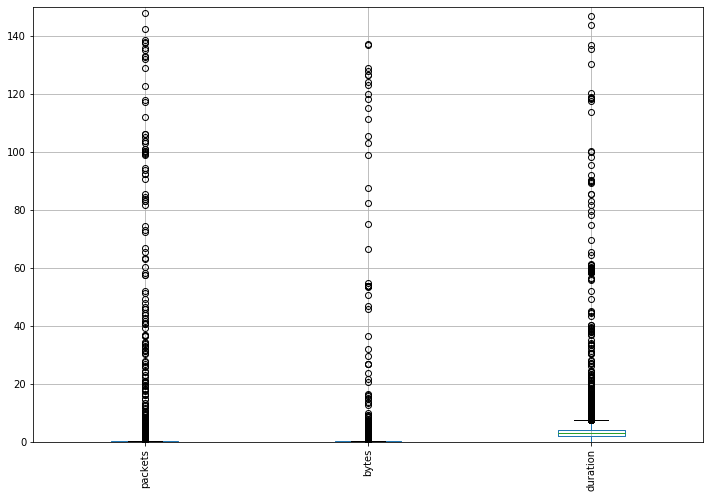

In [219]:
ax = df_nums_scaled[y_pred_anom == -1].drop('class_bin', axis=1).boxplot(figsize=(12, 8))
plt.setp(ax.get_xticklabels(), rotation=90);
ax.set_ylim(0, 150)

(0, 3)

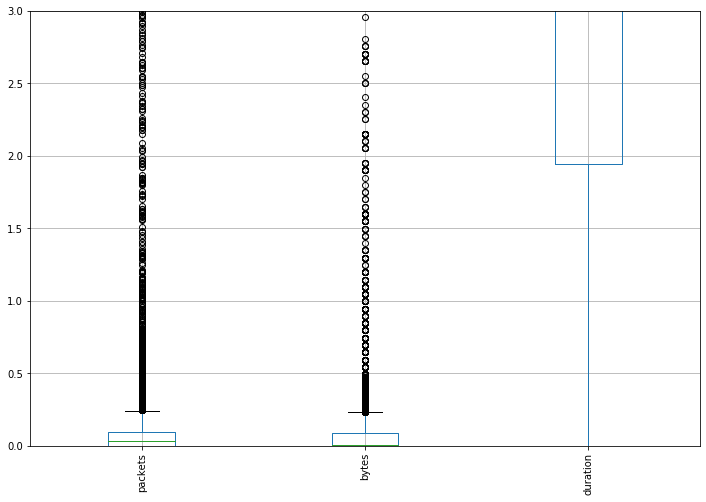

In [220]:
ax = df_nums_scaled[y_pred_anom == -1].drop('class_bin', axis=1).boxplot(figsize=(12, 8))
plt.setp(ax.get_xticklabels(), rotation=90);
ax.set_ylim(0, 3)

<div class="alert alert-block alert-success">
Looking at the above box plots, it does make sense that the rarer instances which had very high values in those columns have been classified as anomalies.
</div>

<div class="alert alert-block alert-success">
This marks the end of the notebook. Thank you for making it this far! We really enjoyed doing the project.
</div>